In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
df = pd.read_csv("wine_quality.csv")

In [3]:
# EDA
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    

check_df(df)

##################### Shape #####################
(1599, 12)
##################### Types #####################
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
##################### Head #####################
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  

In [4]:
# correct column names
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [5]:
# drop duplicates
df = df.drop_duplicates()

In [6]:
# unique values ​​of the target variable
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
# quantities of classes
print(df['quality'].value_counts())

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


Visualization of target and dependent variables

In [8]:
df.describe().T.style.background_gradient(cmap='RdGy', axis=1)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile_acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric_acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual_sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free_sulfur_dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total_sulfur_dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


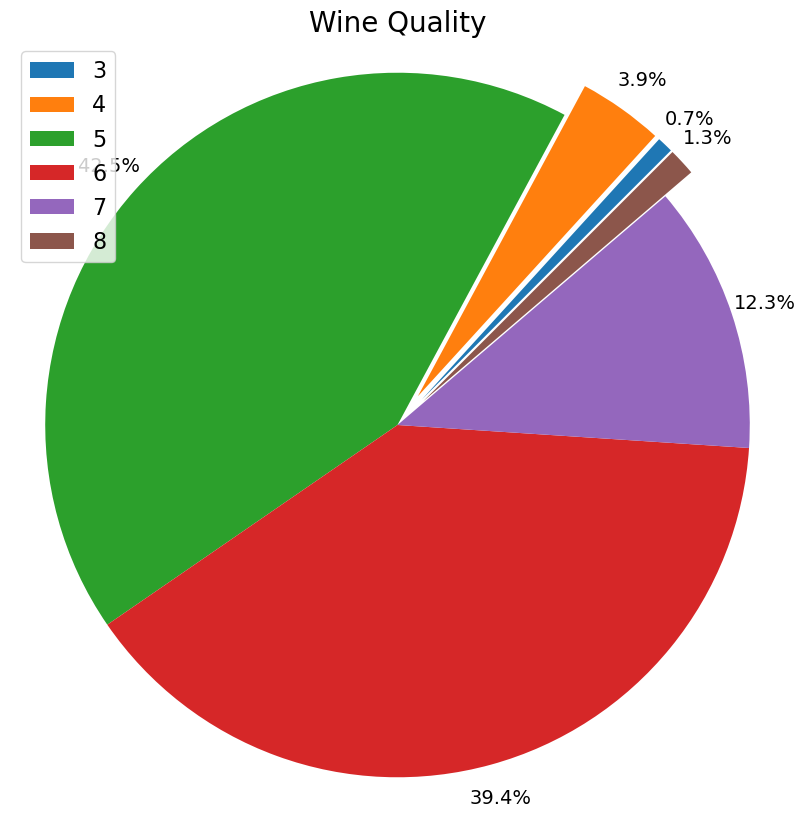

In [9]:
quality = df["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (10,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16);

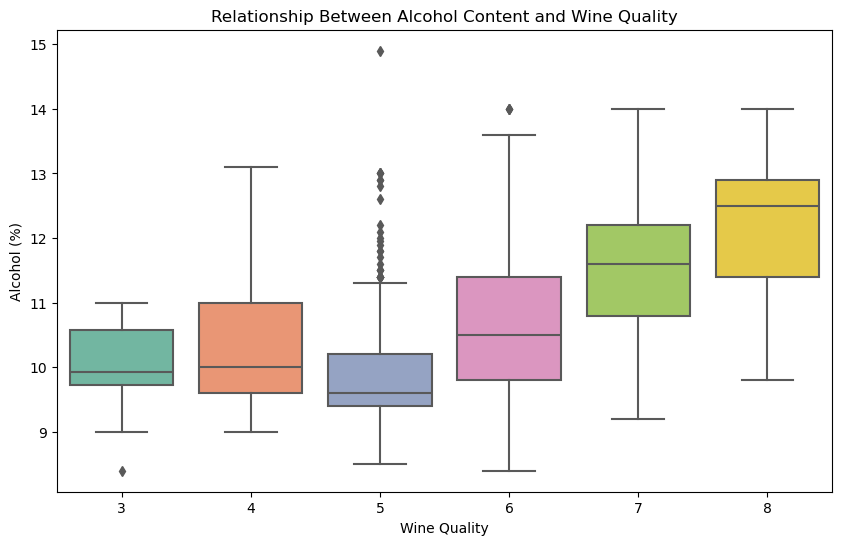

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set2')
plt.title('Relationship Between Alcohol Content and Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol (%)')
plt.show()


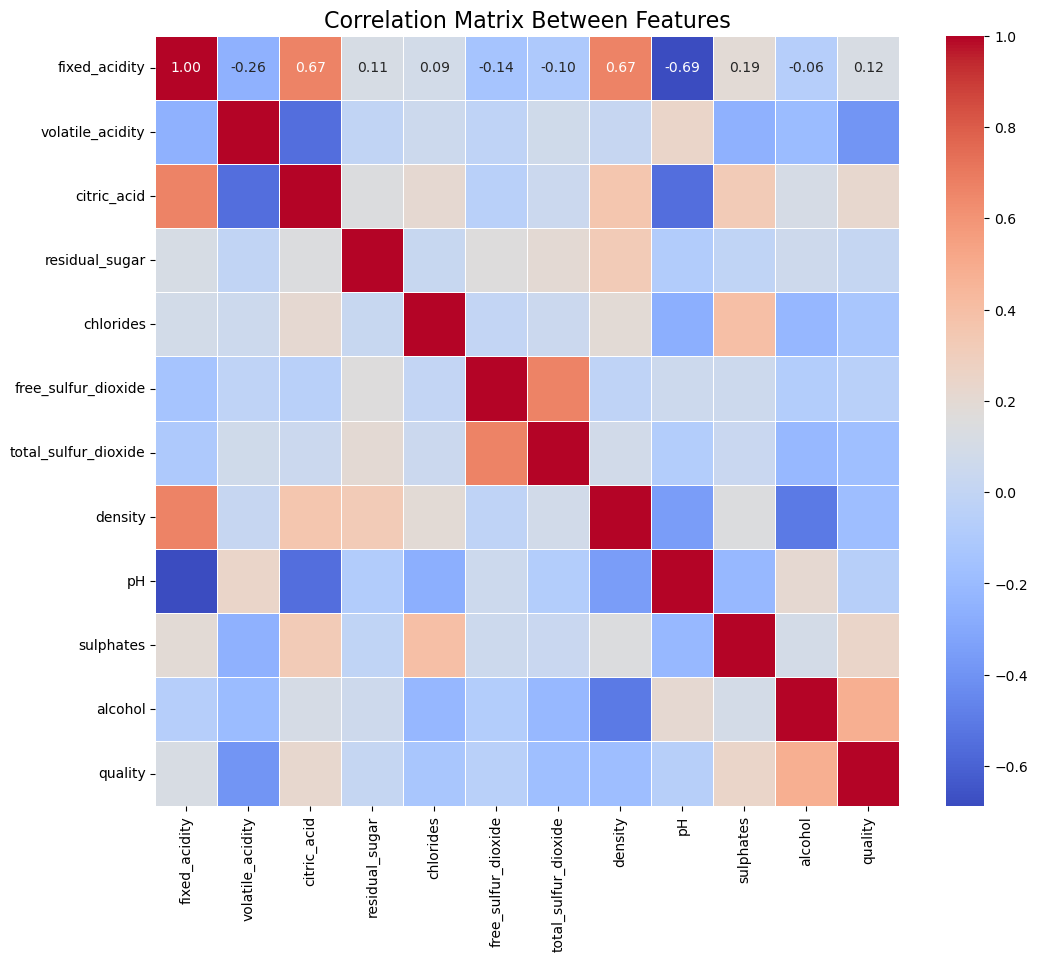

In [11]:
# Sadece sayısal sütunlarla korelasyon matrisi oluştur
numeric_df = df.select_dtypes(include='number')

# Korelasyon matrisi ve heatmap
plt.figure(figsize=(12,10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Features", fontsize=16)
plt.show()


In [12]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric_acid             0.228057
fixed_acidity           0.119024
residual_sugar          0.013640
free_sulfur_dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total_sulfur_dioxide   -0.177855
density                -0.184252
volatile_acidity       -0.395214
Name: quality, dtype: float64

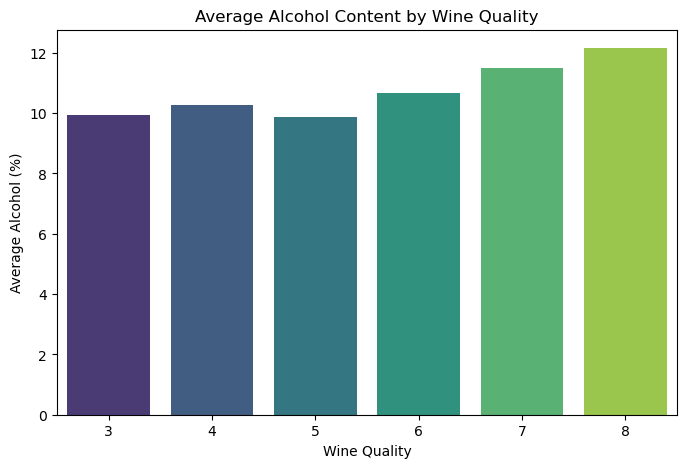

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='alcohol', data=df, palette='viridis', errorbar=None)
plt.title('Average Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol (%)')
plt.show()

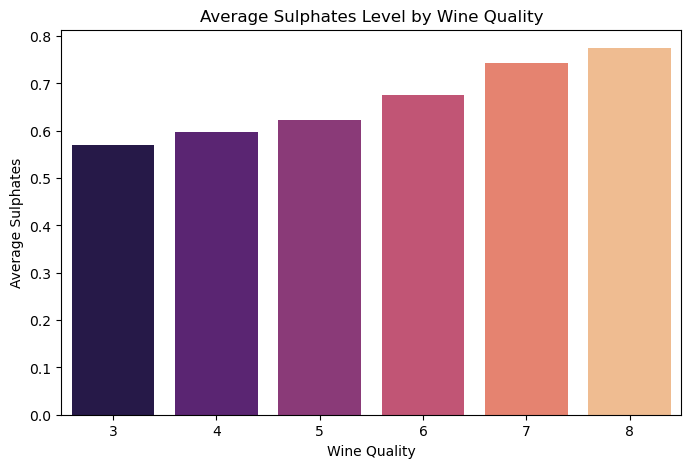

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='sulphates', data=df, palette='magma', errorbar=None)
plt.title('Average Sulphates Level by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Sulphates')
plt.show()


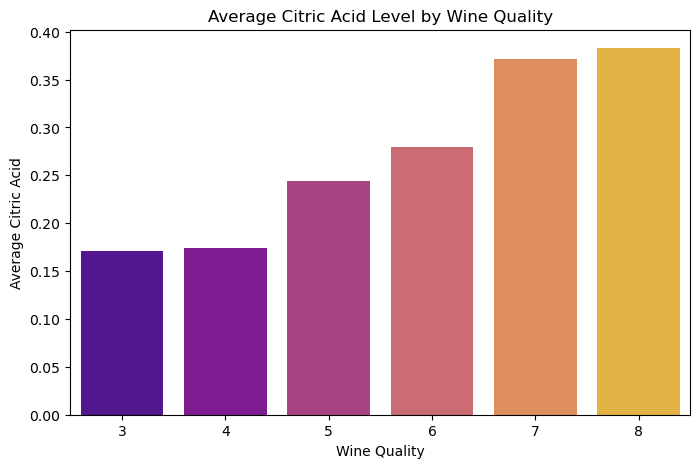

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='citric_acid', data=df, palette='plasma', errorbar=None)
plt.title('Average Citric Acid Level by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Citric Acid')
plt.show()


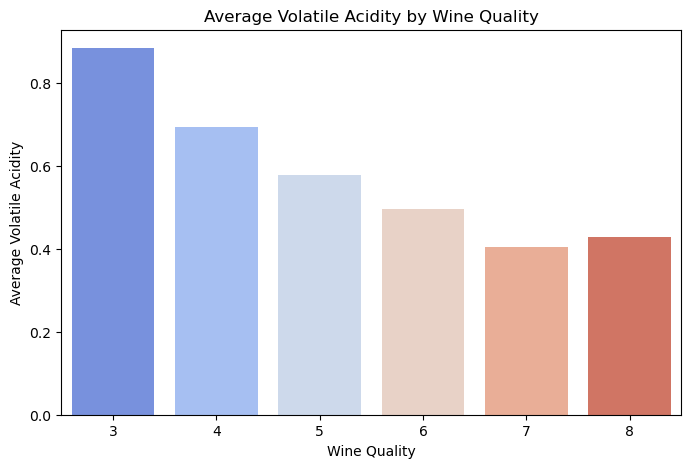

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='volatile_acidity', data=df, palette='coolwarm', errorbar=None)
plt.title('Average Volatile Acidity by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Volatile Acidity')
plt.show()


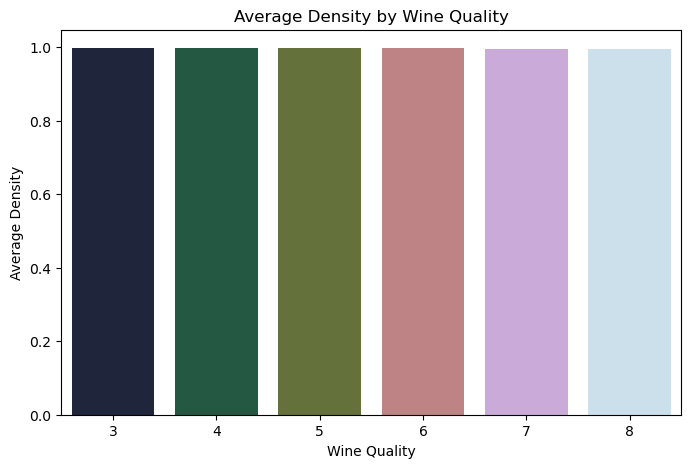

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='density', data=df, palette='cubehelix', errorbar=None)
plt.title('Average Density by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Density')
plt.show()


In [18]:
# categorizing the target variable
def quality_label(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(quality_label)


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode quality_label column
y_encoded = le.fit_transform(df['quality_label'])

# X 
X = df.drop(['quality', 'quality_label'], axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# smote for imbalance of categories
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# basic model
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')

In [21]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1]
}

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid.fit(X_train_smote, y_train_smote)

# best model
best_model = grid.best_estimator_

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# PREDICT WITH THE MODEL
y_pred = best_model.predict(X_test)

# Convert numeric labels to string labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

# show performance
print("Classification Report (labels):\n")
print(classification_report(y_test_labels, y_pred_labels))

print("Confusion Matrix (labels):\n")
print(confusion_matrix(y_test_labels, y_pred_labels))

Classification Report (labels):

              precision    recall  f1-score   support

        High       0.49      0.51      0.50        37
         Low       0.56      0.38      0.45        13
      Medium       0.88      0.89      0.89       222

    accuracy                           0.82       272
   macro avg       0.64      0.60      0.61       272
weighted avg       0.81      0.82      0.81       272

Confusion Matrix (labels):

[[ 19   0  18]
 [  0   5   8]
 [ 20   4 198]]


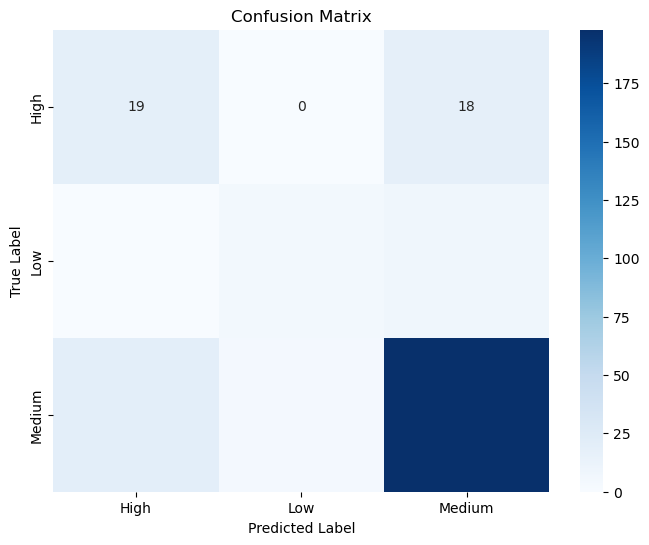

In [24]:
from sklearn.metrics import confusion_matrix

# Confusion matrix 
cm = confusion_matrix(y_test_labels, y_pred_labels)

# class names must be taken in order
labels = le.classes_  # ['High', 'Low', 'Medium']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

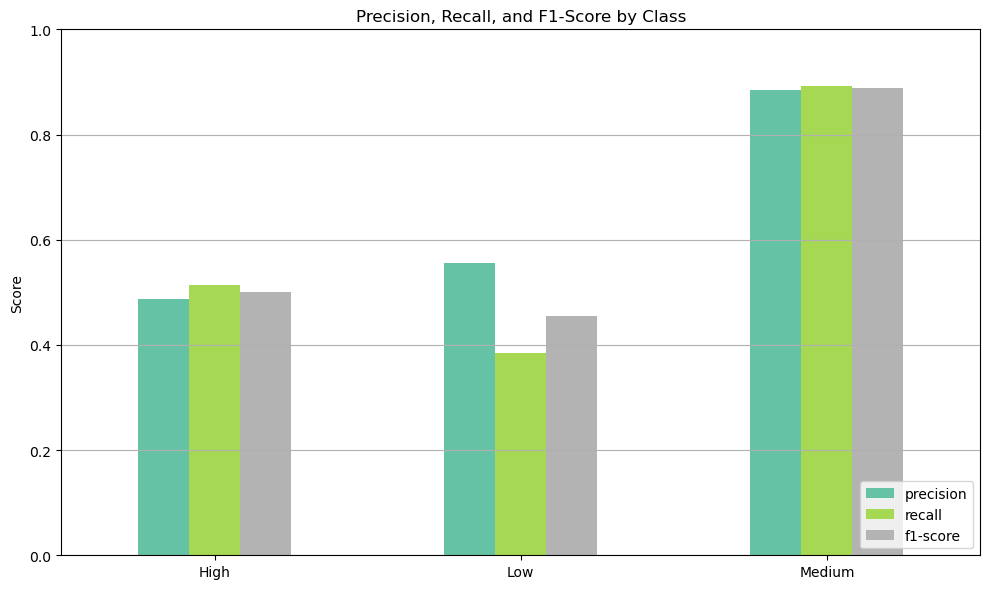

In [25]:
from sklearn.metrics import classification_report
# Get the report in dictionary format
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:3]  # Sadece sınıflar

# Barplot
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Precision, Recall, and F1-Score by Class')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()


plt.savefig("classification_report_barplot.png", dpi=300)
plt.show()